#### 무게 찾기
- 목표 : 농어의 길이 피쳐를 사용해서 무게를 예측하기 
  -> 특정 생선을 지정할 예정 (Perch)
- 데이터셋 : fish.csv
- 피쳐/속성 : Length
- 타겟/라벨 : Weight

[1] 데이터 준비 및 피쳐/타켓 분석

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [119]:
DATA_FILE = r"C:\Hwan\ML_Work\D0826\fish.csv"

In [120]:
fishDF = pd.read_csv(DATA_FILE, usecols=[0, 1, 2])
fishDF.head()

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0


In [121]:
mask = (fishDF["Species"] == "Perch")
# mask = fishDF.Sepecies.isin(["Perch"])

PerchDF = fishDF[mask]
PerchDF.reset_index(drop =  True, inplace = True)
PerchDF

,Species,Weight,Length
0,Perch,5.9,8.4
1,Perch,32.0,13.7
2,Perch,40.0,15.0
3,Perch,51.5,16.2
4,Perch,70.0,17.4
5,Perch,100.0,18.0
6,Perch,78.0,18.7
7,Perch,80.0,19.0
8,Perch,85.0,19.6
9,Perch,85.0,20.0


In [122]:
fishDF = fishDF.drop("Species", axis = "columns").copy()
fishDF.reset_index(drop = True, inplace = True)

[1-1] 피쳐분석 => 상관계수 값, 시각화 2개 모두 고려

In [123]:
fishDF.corr()

,Weight,Length
Weight,1.000000,0.918618
Length,0.918618,1.000000


In [124]:
display(PerchDF.head())
PerchDF.tail()

,Species,Weight,Length
0,Perch,5.9,8.4
1,Perch,32.0,13.7
2,Perch,40.0,15.0
3,Perch,51.5,16.2
4,Perch,70.0,17.4


,Species,Weight,Length
51,Perch,1100.0,42.0
52,Perch,1000.0,43.0
53,Perch,1100.0,43.0
54,Perch,1000.0,43.5
55,Perch,1000.0,44.0


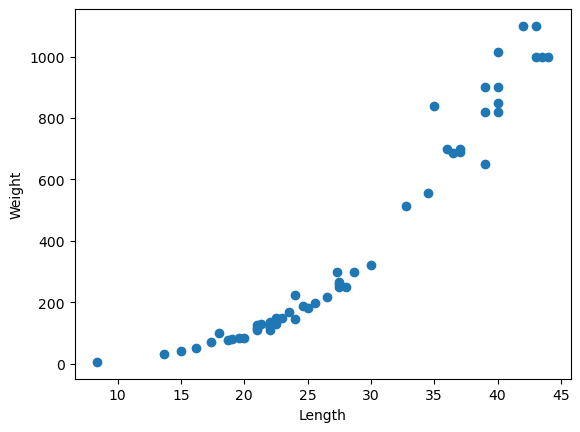

In [125]:
plt.scatter(x=PerchDF['Length'], y=PerchDF['Weight'])
plt.xlabel("Length")
plt.ylabel("Weight")
plt.show()

In [126]:
# 피처, 타겟 나누기

features = PerchDF[['Length']]
target = PerchDF[['Weight']]

print(f'features => {features.shape}, {features.ndim}D')
print(f'targets => {target.shape}, {target.ndim}D')

features => (56, 1), 2D
targets => (56, 1), 2D


In [127]:
print("피쳐", features, sep = "\n")

피쳐
    Length
0      8.4
1     13.7
2     15.0
3     16.2
4     17.4
5     18.0
6     18.7
7     19.0
8     19.6
9     20.0
10    21.0
11    21.0
12    21.0
13    21.3
14    22.0
15    22.0
16    22.0
17    22.0
18    22.0
19    22.5
20    22.5
21    22.7
22    23.0
23    23.5
24    24.0
25    24.0
26    24.6
27    25.0
28    25.6
29    26.5
30    27.3
31    27.5
32    27.5
33    27.5
34    28.0
35    28.7
36    30.0
37    32.8
38    34.5
39    35.0
40    36.5
41    36.0
42    37.0
43    37.0
44    39.0
45    39.0
46    39.0
47    40.0
48    40.0
49    40.0
50    40.0
51    42.0
52    43.0
53    43.0
54    43.5
55    44.0


In [128]:
print("타겟", target, sep = "\n")

타겟
    Weight
0      5.9
1     32.0
2     40.0
3     51.5
4     70.0
5    100.0
6     78.0
7     80.0
8     85.0
9     85.0
10   110.0
11   115.0
12   125.0
13   130.0
14   120.0
15   120.0
16   130.0
17   135.0
18   110.0
19   130.0
20   150.0
21   145.0
22   150.0
23   170.0
24   225.0
25   145.0
26   188.0
27   180.0
28   197.0
29   218.0
30   300.0
31   260.0
32   265.0
33   250.0
34   250.0
35   300.0
36   320.0
37   514.0
38   556.0
39   840.0
40   685.0
41   700.0
42   700.0
43   690.0
44   900.0
45   650.0
46   820.0
47   850.0
48   900.0
49  1015.0
50   820.0
51  1100.0
52  1000.0
53  1100.0
54  1000.0
55  1000.0


[2] 학습 준비 
- 학습 알고리즘 : KNN Regressor
- 피쳐 스케일링 
- 학습용/Test용 DataSet 구분

[2-1] 피쳐와 레이블 타겟 분리
featureDF = fish

In [129]:
from sklearn.model_selection import train_test_split

[2-2] 학습용, Test용 Dataset 분리
- 전체 데이터 셋에서 학습용 : 테스용 비율 -> 75:25로 분리 (띠폴트 값)
- -> 내가 8:2 or 7:3으로 하고 싶으면 바꿔도됨 
- 회귀 데이터셋 -> 데이터셋 구성요소에 대한 비율은 고려 X 

In [130]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, random_state=10) # 75:25 사용할거면 3번째에 값 입력 X
# random_state가 없으면 모델이 자기마음대로 추출, 모델의 성능이 최적화 되지 않았더라면 random_state는 입력 (고정시키는 것)
# --> 똑같은 상황을 만들어서 모델을 최적화 시키기 위해서

In [131]:
print(f"train : {X_train.shape}, {X_train.ndim}D, Y_tain : {Y_train.shape}, {Y_train.ndim}D")
print(f"test : {X_test.shape}, {X_test.ndim}D, Y_tain : {Y_test.shape}, {Y_test.ndim}D")

train : (42, 1), 2D, Y_tain : (42, 1), 2D
test : (14, 1), 2D, Y_tain : (14, 1), 2D


In [132]:
X_train = X_train.reset_index(drop=True)
Y_train = Y_train.reset_index(drop=True)

X_test = X_test.reset_index(drop=True)
Y_test = Y_test.reset_index(drop=True)

[2-3] 피쳐 스케일링

In [133]:
from sklearn.preprocessing import MinMaxScaler

In [134]:
# 스케일러 인스턴스 생성 
# 최대, 최소, 표준편차를 계산
mmScaler = MinMaxScaler()

In [135]:
# 스케일러에 데이터셋 전용에 속성값 설정
mmScaler.fit(X_train) # 데이터를 줄 때, train data를 줘야함, train 데이터를 넣고 학습을 시키고 훈련이 안된 test 데이터를 넣어야함

MinMaxScaler()

In [136]:
mmScaler.min_, mmScaler.scale_
mmScaler.data_min_, mmScaler.data_max_

(array([8.4]), array([44.]))

In [137]:
# 학습용, 테스트용 데이터셋 스케일링 진행
X_train_scaled = mmScaler.transform(X_train)
X_test_scaled = mmScaler.transform(X_test)

In [138]:
mmScaler.fit_transform

<bound method TransformerMixin.fit_transform of MinMaxScaler()>

In [139]:
X = [[0], [1], [2], [3]] # 2차원
y = [0, 0, 1, 1]         # 1차원

from sklearn.neighbors import KNeighborsRegressor

neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X,y)

KNeighborsRegressor(n_neighbors=2)

In [140]:
print(neigh.predict([[1.5]]))

[0.5]


In [141]:
distance, index = neigh.kneighbors([[1.5]])
index = index.reshape(-1)

In [142]:
distance # 거리 값

array([[0.5, 0.5]])

In [143]:
for idx in index.tolist() :
    print(idx, y[idx])

1 0
2 1


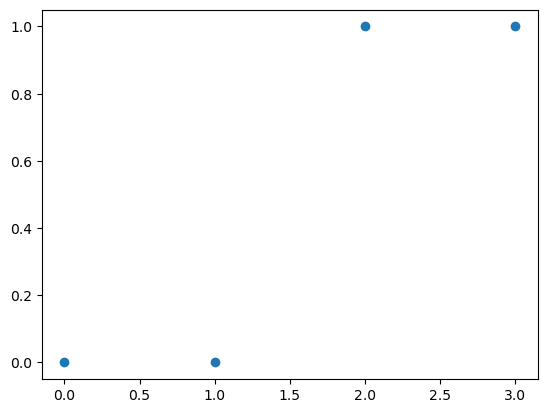

In [144]:
plt.scatter([0,1,2,3], [0,0,1,1])
plt.plot()
plt.show()

[3] 학습 진행

In [145]:
from sklearn.neighbors import KNeighborsRegressor

# 학습 모델 인스턴스 생성
model = KNeighborsRegressor()

# 학습용 데이터셋으로 학습 진행
model.fit(X_train_scaled, Y_train)

KNeighborsRegressor()

In [146]:
# 모델 파라미터 -> 학습 후 fit() 실행 후 설정되는 매개변수
model.n_features_in_, model.n_samples_fit_, model.effective_metric_, model.effective_metric_params_

(1, 42, 'euclidean', {})

[4] 최적의 K 찾기
- 모델 학습 후 성능평가

In [147]:
scores = {}

for k in range(1, model.n_samples_fit_+1) :
    # 최근접 이웃의 갯수 설정 <== 모델 성능을 좌우 : 하이퍼파라미터
    model.n_neighbors = k

    # 성능평가
    score = model.score(X_test_scaled, Y_test)

    scores[k] = score

In [148]:
list(scores.keys())

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42]

In [149]:
list(scores.values())

[0.8867767106725298,
 0.8902744839236241,
 0.9541620518366766,
 0.9496548517220494,
 0.9552309001331776,
 0.9570871622531959,
 0.9395617911241136,
 0.9436687954896039,
 0.947476550061703,
 0.9332517838419572,
 0.9381859273401066,
 0.940880713501685,
 0.9421807206510717,
 0.9426915672987161,
 0.9293832644637922,
 0.9258668450207346,
 0.91580948011262,
 0.930627278995754,
 0.9240712120435385,
 0.9217739283727472,
 0.9137627929038845,
 0.8908523519528293,
 0.8684185788306937,
 0.8659178875544221,
 0.848420453624164,
 0.8158469323717102,
 0.7823678782245695,
 0.7407942749200485,
 0.7002359585202819,
 0.6434659396852467,
 0.5901199938949999,
 0.5170889607934805,
 0.44756110947435535,
 0.3462697346451107,
 0.2260512137880153,
 0.13025791100536255,
 0.05745336451571459,
 -0.09236769294712488,
 -0.233153164834901,
 -0.3814682396409934,
 -0.5265425622090913,
 -0.6266233871157569]

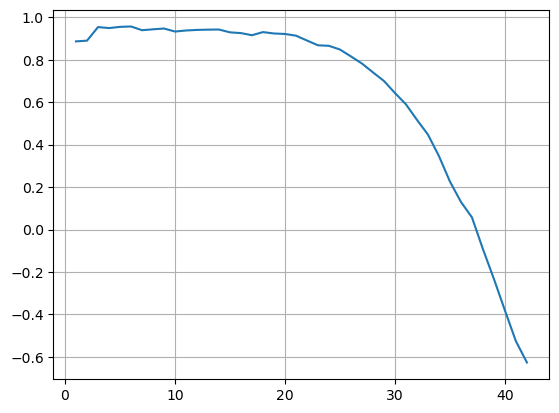

In [150]:
plt.plot(list(scores.keys()), list(scores.values()))
plt.grid()
plt.show()

In [151]:
# Max값 추출 => lambda
# 정렬해서 높은거 뽑기 => 키값이 기준이므로 정확하지 않음

sorted(scores, reverse=True) # key 중심

[42,
 41,
 40,
 39,
 38,
 37,
 36,
 35,
 34,
 33,
 32,
 31,
 30,
 29,
 28,
 27,
 26,
 25,
 24,
 23,
 22,
 21,
 20,
 19,
 18,
 17,
 16,
 15,
 14,
 13,
 12,
 11,
 10,
 9,
 8,
 7,
 6,
 5,
 4,
 3,
 2,
 1]

In [152]:
# 값이 가장 높은 값
sorted(scores.items(), key = lambda x:x[1], reverse = True)

[(6, 0.9570871622531959),
 (5, 0.9552309001331776),
 (3, 0.9541620518366766),
 (4, 0.9496548517220494),
 (9, 0.947476550061703),
 (8, 0.9436687954896039),
 (14, 0.9426915672987161),
 (13, 0.9421807206510717),
 (12, 0.940880713501685),
 (7, 0.9395617911241136),
 (11, 0.9381859273401066),
 (10, 0.9332517838419572),
 (18, 0.930627278995754),
 (15, 0.9293832644637922),
 (16, 0.9258668450207346),
 (19, 0.9240712120435385),
 (20, 0.9217739283727472),
 (17, 0.91580948011262),
 (21, 0.9137627929038845),
 (22, 0.8908523519528293),
 (2, 0.8902744839236241),
 (1, 0.8867767106725298),
 (23, 0.8684185788306937),
 (24, 0.8659178875544221),
 (25, 0.848420453624164),
 (26, 0.8158469323717102),
 (27, 0.7823678782245695),
 (28, 0.7407942749200485),
 (29, 0.7002359585202819),
 (30, 0.6434659396852467),
 (31, 0.5901199938949999),
 (32, 0.5170889607934805),
 (33, 0.44756110947435535),
 (34, 0.3462697346451107),
 (35, 0.2260512137880153),
 (36, 0.13025791100536255),
 (37, 0.05745336451571459),
 (38, -0.0923

[5] 데이터셋에 없는 값이 입력됐을때의 예측 무게 계산 (예측값)

In [153]:
# 최적의 K 값
best_k = sorted(scores.items(), key = lambda x:x[1], reverse = True)[0][0]
best_k

6

In [154]:
# 모델의 적용 => n.neighbors에 설정
model.n_neighbors = best_k

[6] 새로운 데이터의 무게 예측

In [155]:
new_lengh = input("농어 길이 : ")

In [156]:
print(f"new_length : {new_lengh}")

new_length : 44


In [157]:
# 2D DataFrame
dataDF = pd.DataFrame([[new_lengh]], columns = ["Length"])
dataDF

,Length
0,44


In [158]:
# 피쳐 스케일링
data_scale = mmScaler.transform(dataDF)

data_scale

array([[1.]])

In [159]:
# 예측
model.predict(data_scale)

array([[1008.33333333]])

In [160]:
distance, index = model.kneighbors(data_scale)

print(distance, index, sep = "\n")

[[0.         0.01404494 0.02808989 0.02808989 0.05617978 0.11235955]]
[[31 27 30  3 15 12]]


In [161]:
X_train.iloc[index.reshape(-1)]

,Length
31,44.0
27,43.5
30,43.0
3,43.0
15,42.0
12,40.0


In [162]:
# X_train의 값 -> 우리가 찾아야 하는 값은 y_train

X_train_scaled[[31, 27, 30, 3, 15, 12]]

array([[1.        ],
       [0.98595506],
       [0.97191011],
       [0.97191011],
       [0.94382022],
       [0.88764045]])

In [163]:
# Y_train.index
# X_train_scaled와 인덱스가 맞지않음
# 앞에 코드에 
# X_train = X_train.reset_index(drop=True)
# Y_train = Y_train.reset_index(drop=True)

# X_test = X_test.reset_index(drop=True)
# Y_test = Y_test.reset_index(drop=True)
# 추가해줌

RangeIndex(start=0, stop=42, step=1)

In [167]:
Y_train[index.reshape(-1)].sum()/model.n_neighbors

KeyError: "None of [Index([31, 27, 30, 3, 15, 12], dtype='int64')] are in the [columns]"

##### KNN Regressor의 단점

In [172]:
# 임의의 데이터
new_lenght = 52

# 2D DataFrame
dataDF = pd.DataFrame([[new_lenght]], columns = ["Lenght"])

# 피쳐 스케일
data_scale = mmScaler.transform(dataDF)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Lenght
Feature names seen at fit time, yet now missing:
- Length


: 

In [169]:
# 예측
model.predict(data_scale)

array([[1008.33333333]])

=> 학습 데이터셋의 범위를 벗어난 더 큰 데이터, 더 작은 데이터의 경우

 
   정확한 예측 불가